In [37]:
import scipy.io
import numpy as np
import CMR_IA as cmr
import matplotlib.pyplot as plt
import pickle
from statistics import mean, stdev
import pprint
# import import_ipynb
import time
import pandas as pd
import seaborn as sns

In [38]:
with open("../Data/simuS1_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
df_study = df_study.query("group == 3")
df_test = df_test.query("group == 3")

In [39]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [40]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.3,
    beta_cue = 0.4,
    beta_rec = 0.1,
    # beta_rec_new = 0.1, # beta for retrieved item
    beta_distract = 0.1,
    beta_rec_post = 0.9,
    gamma_fc = 0.2,
    gamma_cf = 0.2,
    s_fc = 0.2,
    s_cf = 0.2,
    c_thresh = 0.3,
    c_thresh_ass = 0.70,
    kappa = 0,
    lamb = 0,
    eta = 0,
    phi_s = 1,
    phi_d = 0.6,
    nitems_in_accumulator = 136,
    d_ass = 1,
    learn_while_retrieving = True,
    omega = 3,
    alpha = 1,
    var_enc = 1,
    bad_enc_ratio = 1,
)
params

{'beta_enc': 0.3,
 'beta_rec': 0.1,
 'beta_cue': 0.4,
 'beta_rec_post': 0.9,
 'beta_distract': 0.1,
 'phi_s': 1,
 'phi_d': 0.6,
 's_cf': 0.2,
 's_fc': 0.2,
 'kappa': 0,
 'eta': 0,
 'omega': 3,
 'alpha': 1,
 'c_thresh': 0.3,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.7,
 'd_ass': 1,
 'lamb': 0,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 136,
 'max_recalls': 50,
 'learn_while_retrieving': True,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.2,
 'gamma_cf': 0.2}

In [41]:
df_study = df_study.loc[df_study.session == 0]
# df_study = df_study.loc[df_study.session == 0].iloc[0:5]
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,order,pair_idx,list,session,subject,group
0,383,1453,COSTUME,THERMOMETER,0,0,0,0,0,3
1,1122,681,PRIEST,HAMMOCK,1,1,0,0,0,3
2,1048,1610,PERCH,WILDERNESS,1,2,0,0,0,3
3,626,542,GAUZE,EWE,0,3,0,0,0,3
4,918,1130,MOSS,PROFESSIONAL,1,4,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
139,845,524,LOUNGE,ELEVATOR,-1,43,2,0,0,3
140,525,115,ELF,BEET,-1,44,2,0,0,3
141,1630,216,YARD,CAFE,-1,45,2,0,0,3
142,249,612,CARROT,FUGITIVE,-1,46,2,0,0,3


In [42]:
df_test = df_test.loc[df_test.session == 0]
# df_test = pd.DataFrame()
# df_test['test_itemno1'] = [581,745,710,581,1087]
# df_test['test_itemno2'] = [634,147,1087,-1,-1]
# df_test['correct_ans'] = [1,0,1,634,710]
# df_test['session'] = 0
# df_test['test'] = [1] * 3 + [2] * 2
df_test

,test_itemno1,test_itemno2,test_item1,test_item2,correct_ans,order,pair_idx,test,list,session,subject,group
0,319,-1,CLAW,NaN,1,0,23,1,0,0,0,3
1,1415,-1,SUSPECT,NaN,0,-1,-1,1,0,0,0,3
2,486,-1,DOOR,NaN,0,-1,-1,1,0,0,0,3
3,541,-1,EUROPE,NaN,1,0,28,1,0,0,0,3
4,48,-1,ASSISTANT,NaN,0,-1,-1,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
355,1095,-1,POET,NaN,690,1,30,2,2,0,0,3
356,485,-1,DONOR,NaN,266,0,27,2,2,0,0,3
357,750,-1,JAR,NaN,452,1,11,2,2,0,0,3
358,1134,-1,PRUNE,NaN,1386,1,35,2,2,0,0,3


In [43]:
list_num = len(np.unique(df_study.list))
test1_num = sum(df_test.query("session == 0 and list == 0").test == 1)
test1_num

80

In [44]:
df_thin = df_test[['session','list','test_itemno1','test_itemno2']]
df_thin = df_thin.assign(s_resp=np.nan, s_rt=np.nan)
df_thin

,session,list,test_itemno1,test_itemno2,s_resp,s_rt
0,0,0,319,-1,NaN,NaN
1,0,0,1415,-1,NaN,NaN
2,0,0,486,-1,NaN,NaN
3,0,0,541,-1,NaN,NaN
4,0,0,48,-1,NaN,NaN
...,...,...,...,...,...,...
355,0,2,1095,-1,NaN,NaN
356,0,2,485,-1,NaN,NaN
357,0,2,750,-1,NaN,NaN
358,0,2,1134,-1,NaN,NaN


In [45]:
# extarct the session data
sess = 0
pres_mat = df_study.loc[df_study.session == sess, ['study_itemno1', 'study_itemno2']].to_numpy()
pres_mat = np.reshape(pres_mat, (list_num, -1, 2))
pres_mat

array([[[ 383, 1453],
        [1122,  681],
        [1048, 1610],
        [ 626,  542],
        [ 918, 1130],
        [ 169,  963],
        [ 538, 1529],
        [ 516,  638],
        [ 662,  423],
        [ 250,  635],
        [1503,   57],
        [ 412,  170],
        [1114,  152],
        [ 176, 1545],
        [ 562,  417],
        [1269, 1170],
        [ 291,  211],
        [  10, 1567],
        [ 557, 1175],
        [ 535,  640],
        [1192,  722],
        [1360,  945],
        [  59,  559],
        [1376,  319],
        [ 907,  677],
        [ 803, 1086],
        [1044,  446],
        [ 594,  853],
        [ 824,  541],
        [ 736, 1536],
        [1348, 1124],
        [1577,  189],
        [ 356, 1478],
        [ 389,  236],
        [ 465,  241],
        [ 809,  896],
        [1423,  570],
        [1083,  221],
        [ 658, 1549],
        [ 506, 1566],
        [ 770,  160],
        [1365,  854],
        [1020,  632],
        [  62,  707],
        [1632, 1060],
        [ 

In [46]:
cue_mat = df_thin.loc[df_thin.session == sess, ['test_itemno1','test_itemno2']].to_numpy()
cue_mat = np.reshape(cue_mat,(list_num, -1, 2))
cue_mat

array([[[ 319,   -1],
        [1415,   -1],
        [ 486,   -1],
        [ 541,   -1],
        [  48,   -1],
        [ 677,   -1],
        [ 635,   -1],
        [ 596,   -1],
        [ 412,   -1],
        [1453,   -1],
        [ 516,   -1],
        [1416,   -1],
        [1430,   -1],
        [ 454,   -1],
        [ 736,   -1],
        [ 423,   -1],
        [ 580,   -1],
        [1270,   -1],
        [ 186,   -1],
        [1163,   -1],
        [ 443,   -1],
        [1034,   -1],
        [ 457,   -1],
        [ 291,   -1],
        [1269,   -1],
        [  10,   -1],
        [ 918,   -1],
        [ 506,   -1],
        [1175,   -1],
        [ 465,   -1],
        [ 654,   -1],
        [1192,   -1],
        [  57,   -1],
        [1083,   -1],
        [1549,   -1],
        [ 809,   -1],
        [1348,   -1],
        [ 108,   -1],
        [1049,   -1],
        [ 594,   -1],
        [ 110,   -1],
        [ 945,   -1],
        [ 820,   -1],
        [ 152,   -1],
        [  32,   -1],
        [ 

In [47]:
sem_mat = s_mat

In [48]:
model = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None,
           rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Success', mode='Recog-CR',test1_num=test1_num)

In [49]:
model.pres_indexes

array([[[ 85, 356],
        [287, 169],
        [267, 396],
        [152, 129],
        [231, 290],
        [ 38, 243],
        [127, 374],
        [121, 156],
        [164,  93],
        [ 59, 155],
        [366,  12],
        [ 90,  39],
        [285,  33],
        [ 40, 377],
        [132,  92],
        [318, 298],
        [ 68,  47],
        [  1, 384],
        [130, 299],
        [126, 157],
        [306, 179],
        [332, 237],
        [ 13, 131],
        [336,  72],
        [229, 168],
        [196, 278],
        [266,  99],
        [141, 210],
        [202, 128],
        [182, 375],
        [331, 288],
        [388,  44],
        [ 78, 362],
        [ 86,  54],
        [106,  55],
        [198, 226],
        [346, 136],
        [277,  50],
        [163, 378],
        [119, 383],
        [191,  36],
        [333, 211],
        [259, 154],
        [ 14, 176],
        [404, 272],
        [228, 194],
        [181, 250],
        [101,  83]],

       [[257, 376],
        [192, 407]

In [50]:
model.cues_indexes[0]

array([[ 72,  -1],
       [342,  -1],
       [114,  -1],
       [128,  -1],
       [  9,  -1],
       [168,  -1],
       [155,  -1],
       [142,  -1],
       [ 90,  -1],
       [356,  -1],
       [121,  -1],
       [343,  -1],
       [350,  -1],
       [103,  -1],
       [182,  -1],
       [ 93,  -1],
       [139,  -1],
       [319,  -1],
       [ 43,  -1],
       [296,  -1],
       [ 98,  -1],
       [262,  -1],
       [104,  -1],
       [ 68,  -1],
       [318,  -1],
       [  1,  -1],
       [231,  -1],
       [119,  -1],
       [299,  -1],
       [106,  -1],
       [161,  -1],
       [306,  -1],
       [ 12,  -1],
       [277,  -1],
       [378,  -1],
       [198,  -1],
       [331,  -1],
       [ 22,  -1],
       [268,  -1],
       [141,  -1],
       [ 23,  -1],
       [237,  -1],
       [201,  -1],
       [ 33,  -1],
       [  4,  -1],
       [243,  -1],
       [209,  -1],
       [196,  -1],
       [388,  -1],
       [215,  -1],
       [320,  -1],
       [ 78,  -1],
       [382,

In [51]:
model.nlists

3

In [52]:
model.ndistractors

9

In [53]:
model.nitems_unique

408

In [54]:
model.run_success_single_sess()

# in model:
# print(self.att_vec[self.all_nos_unique[item_idx]-1])
# print(np.dot(self.c_old[:self.nitems_unique], self.f[:self.nitems_unique].T))

In [55]:
model.test1_num

80

In [56]:
# model.rec_items

In [57]:
# model.rec_times

In [58]:
# model.f_in_acc

<Axes: >

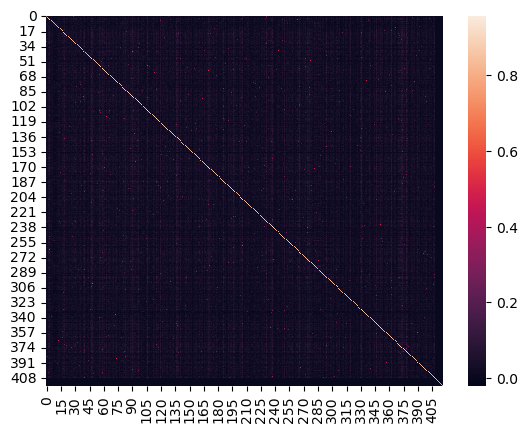

In [59]:
sns.heatmap(model.M_FC)

<Axes: >

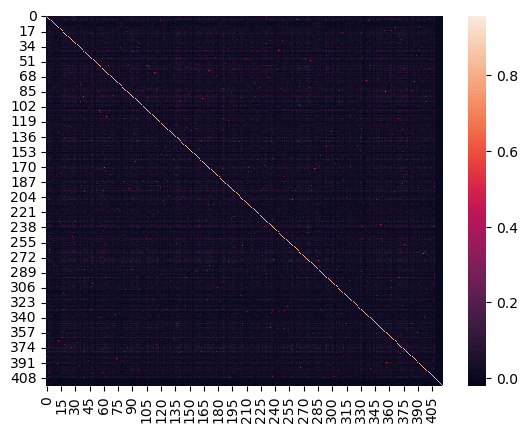

In [60]:
sns.heatmap(model.M_CF)

In [61]:
recs = model.rec_items
rts = model.rec_times
result = np.column_stack((recs,rts))

df_thin.loc[df_thin.session==sess, ['s_resp','s_rt']] = result
df_thin['test'] = df_test['test']
df_simu = df_thin.merge(df_test,on=['session','list','test_itemno1','test_itemno2','test'])
df_simu['correct'] = df_simu['s_resp'] == df_simu['correct_ans']
df_simu['csim'] = model.recog_similarity
df_simu

,session,list,test_itemno1,test_itemno2,s_resp,s_rt,test,test_item1,test_item2,correct_ans,order,pair_idx,subject,group,correct,csim
0,0,0,319,-1,0.0,636.929810,1,CLAW,NaN,1,0,23,0,3,False,0.425964
1,0,0,1415,-1,0.0,110.253601,1,SUSPECT,NaN,0,-1,-1,0,3,True,0.338270
2,0,0,486,-1,0.0,256.243805,1,DOOR,NaN,0,-1,-1,0,3,True,0.380438
3,0,0,541,-1,0.0,40.361740,1,EUROPE,NaN,1,0,28,0,3,False,0.288025
4,0,0,48,-1,0.0,3.802440,1,ASSISTANT,NaN,0,-1,-1,0,3,True,0.169913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,2,1095,-1,690.0,1100.000000,2,POET,NaN,690,1,30,0,3,True,0.724187
356,0,2,485,-1,266.0,1090.000000,2,DONOR,NaN,266,0,27,0,3,True,0.694780
357,0,2,750,-1,489.0,1050.000000,2,JAR,NaN,452,1,11,0,3,False,0.669034
358,0,2,1134,-1,1638.0,1070.000000,2,PRUNE,NaN,1386,1,35,0,3,False,0.671571


In [62]:
len(f_in_dif)

120

In [63]:
# get f_in
df_tmp = df_study.loc[df_study.session == sess]
tmp1 = df_tmp.study_itemno1.to_numpy()
tmp2 = df_tmp.study_itemno2.to_numpy()
df_tmp2 = df_test.loc[df_test.session == sess]
tmp3 = df_tmp2.test_itemno1[df_tmp2.test_itemno1 >= 0].to_numpy()
tmp4 = df_tmp2.test_itemno2[df_tmp2.test_itemno2 >= 0].to_numpy()
tmp = np.concatenate((tmp1, tmp2, tmp3, tmp4))
tmp = np.unique(tmp)  # sort

nlists = 3
test1_num = 80
f_in_dif = model.f_in_dif

corr = []
omax = []
omean = []
for lst in range(nlists):
    tmp_corr = df_simu.query(f"session == {sess} and list == {lst}")["correct_ans"][test1_num:]
    corrid = np.searchsorted(tmp, tmp_corr)
    corr_fin = [f_in_dif[lst*40+i][id] for i, id in enumerate(corrid)]
    omax_fin = [np.max(np.delete(f_in_dif[lst*40+i], id)) for i, id in enumerate(corrid)]
    omean_fin = [np.mean(np.delete(f_in_dif[lst*40+i], id)) for i, id in enumerate(corrid)]

    corr = corr + [-1] * test1_num + corr_fin
    omax = omax + [-1] * test1_num + omax_fin
    omean = omean + [-1] * test1_num + omean_fin

df_simu['corr_fin'] = corr
df_simu['omax_fin'] = omax
df_simu['omean_fin'] = omean
df_simu

,session,list,test_itemno1,test_itemno2,s_resp,s_rt,test,test_item1,test_item2,correct_ans,order,pair_idx,subject,group,correct,csim,corr_fin,omax_fin,omean_fin
0,0,0,319,-1,0.0,636.929810,1,CLAW,NaN,1,0,23,0,3,False,0.425964,-1.000000,-1.000000,-1.000000
1,0,0,1415,-1,0.0,110.253601,1,SUSPECT,NaN,0,-1,-1,0,3,True,0.338270,-1.000000,-1.000000,-1.000000
2,0,0,486,-1,0.0,256.243805,1,DOOR,NaN,0,-1,-1,0,3,True,0.380438,-1.000000,-1.000000,-1.000000
3,0,0,541,-1,0.0,40.361740,1,EUROPE,NaN,1,0,28,0,3,False,0.288025,-1.000000,-1.000000,-1.000000
4,0,0,48,-1,0.0,3.802440,1,ASSISTANT,NaN,0,-1,-1,0,3,True,0.169913,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,2,1095,-1,690.0,1100.000000,2,POET,NaN,690,1,30,0,3,True,0.724187,-0.085789,-0.122361,-0.954608
356,0,2,485,-1,266.0,1090.000000,2,DONOR,NaN,266,0,27,0,3,True,0.694780,-0.077760,-0.139117,-0.979455
357,0,2,750,-1,489.0,1050.000000,2,JAR,NaN,452,1,11,0,3,False,0.669034,-0.367712,-0.041083,-0.951505
358,0,2,1134,-1,1638.0,1070.000000,2,PRUNE,NaN,1386,1,35,0,3,False,0.671571,-0.089171,-0.064984,-0.974207


In [64]:
df_simu.iloc[80:]

,session,list,test_itemno1,test_itemno2,s_resp,s_rt,test,test_item1,test_item2,correct_ans,order,pair_idx,subject,group,correct,csim,corr_fin,omax_fin,omean_fin
80,0,0,1536,-1,1549.0,1220.0,2,UNCLE,NaN,736,1,29,0,3,False,0.608530,-0.511665,-0.177938,-0.644932
81,0,0,722,-1,570.0,1300.0,2,HOSTAGE,NaN,1192,1,20,0,3,False,0.597359,-0.329821,-0.227038,-0.657026
82,0,0,535,-1,1348.0,1300.0,2,ENGINE,NaN,640,0,19,0,3,False,0.600546,-0.329801,-0.224967,-0.662788
83,0,0,250,-1,1044.0,1310.0,2,CART,NaN,635,0,9,0,3,False,0.601513,-0.412475,-0.231583,-0.662461
84,0,0,170,-1,412.0,1210.0,2,BREAD,NaN,412,1,11,0,3,True,0.689125,-0.167623,-0.208620,-0.669745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,2,1095,-1,690.0,1100.0,2,POET,NaN,690,1,30,0,3,True,0.724187,-0.085789,-0.122361,-0.954608
356,0,2,485,-1,266.0,1090.0,2,DONOR,NaN,266,0,27,0,3,True,0.694780,-0.077760,-0.139117,-0.979455
357,0,2,750,-1,489.0,1050.0,2,JAR,NaN,452,1,11,0,3,False,0.669034,-0.367712,-0.041083,-0.951505
358,0,2,1134,-1,1638.0,1070.0,2,PRUNE,NaN,1386,1,35,0,3,False,0.671571,-0.089171,-0.064984,-0.974207
